In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from time import time
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [49]:
# Read the data set into python
Data = pd.read_excel('iris.xls')
Data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
# No. of rows and columns
Data.shape

(150, 5)

In [51]:
# Checking the null values using isnull() function 
Data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [52]:
# Information on data types 
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [53]:
# Statistics details of integer values
Data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [54]:
# Details on dependent variable
Data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

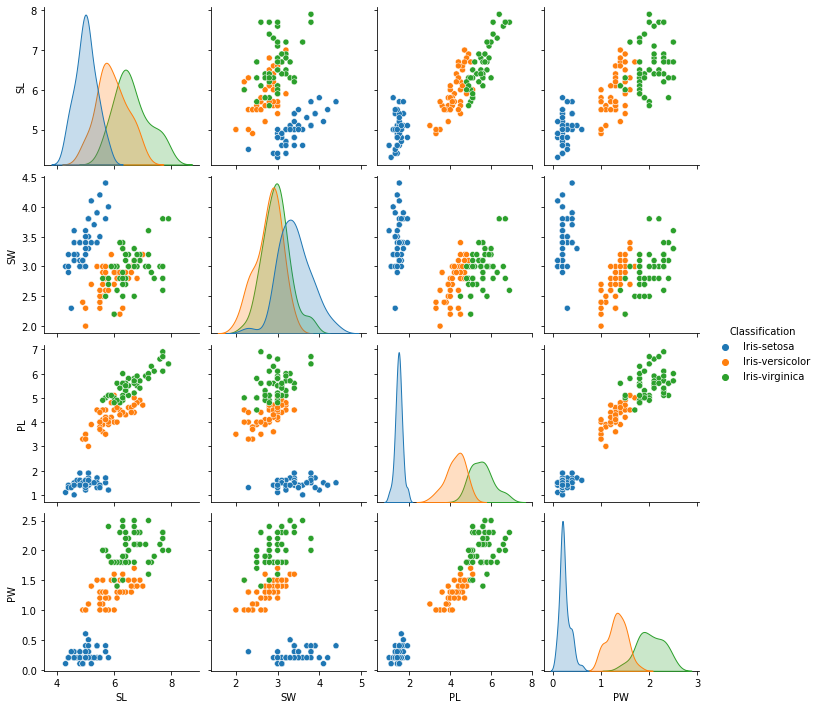

In [10]:
pairplot = sns.pairplot(Data, hue = 'Classification')


<AxesSubplot:>

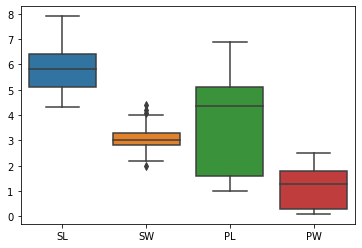

In [55]:
# Checking for the outliers
sns.boxplot(data = Data)

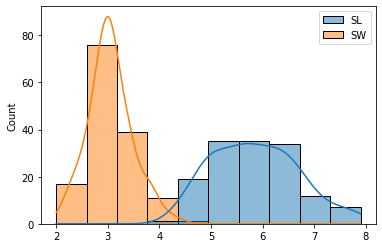

In [12]:
# Handing the null values
fre_graph = sns.histplot(Data[['SL','SW']],kde = True)


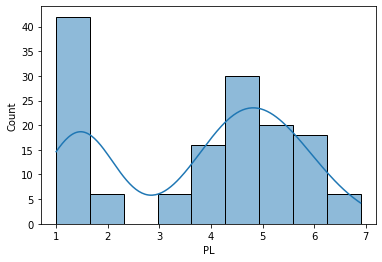

In [13]:
fre_graph = sns.histplot(Data['PL'],kde = True)


In [56]:
Data[['SL','SW','PL']].mean()

SL    5.855944
SW    3.049306
PL    3.756250
dtype: float64

The Null values in SL and SW can be replaced with the mean value.

In [57]:
for i in ['SL','SW']:
    Data[i] = Data[i].fillna(Data[i].mean())

In [59]:
Data['PL'] = Data['PL'].fillna(Data['PL'].median())

In [60]:
Data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

We could see that all the Null values have been removed.


# Pre-Processing:


In [61]:
# Object Column
Data['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [62]:
# Converting the object column using map function
Data['Classification'] = Data['Classification'].map({'Iris-setosa': 0, 'Iris-versicolor' : 1, 'Iris-virginica' : 2})

In [20]:
Data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


In [63]:
corr_matrix = Data.corr()

<AxesSubplot:>

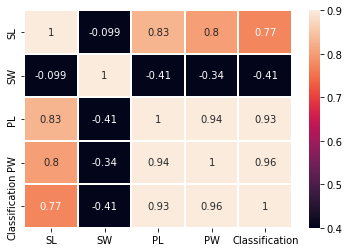

In [64]:
sns.heatmap(corr_matrix, vmax=0.9, vmin= 0.4, annot=True, linewidth = 0.2)

We could see that all the features are highly correlated to each other.


In [65]:
x = Data.drop('Classification',axis=1)
y = Data['Classification']

In [66]:
y.unique()

array([0, 1, 2], dtype=int64)

# Selecting the classification model which gives the best result to predict iris species (also do random forest algorithm)

In [67]:
# Split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [68]:
x_train.shape

(120, 4)

In [69]:
y_train.shape

(120,)

In [70]:
x_test.shape

(30, 4)

In [71]:
y_test.shape

(30,)

In [72]:
# Building the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [73]:
# Evaluating the performance
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

In [74]:
print('Accuracy Score is : ',accuracy_score(y_test,y_pred))
print('Recall Score is : ', recall_score(y_test,y_pred, average='micro'))
print('Precision Score is : ', precision_score(y_test,y_pred, average='micro'))
print('F1 score is : ', f1_score(y_test,y_pred, average='micro'))

Accuracy Score is :  1.0
Recall Score is :  1.0
Precision Score is :  1.0
F1 score is :  1.0


In [75]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [76]:
# Check for feature importance
pd.Series(rf.feature_importances_,index= x.columns).sort_values(ascending=False) * 100

PW    47.963029
PL    38.210764
SL    10.185448
SW     3.640759
dtype: float64

In [77]:
# Logistic regression model
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(random_state =42)
logit_model.fit(x_train,y_train)
y_pred = logit_model.predict(x_test)

In [78]:
print('Accuracy Score is : ',accuracy_score(y_test,y_pred))
print('Recall Score is : ', recall_score(y_test,y_pred, average='micro'))
print('Precision Score is : ', precision_score(y_test,y_pred, average='micro'))
print('F1 score is : ', f1_score(y_test,y_pred, average='micro'))

Accuracy Score is :  1.0
Recall Score is :  1.0
Precision Score is :  1.0
F1 score is :  1.0


In [79]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier

#to obtain optimum k values 
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)
    acc_values

Text(0, 0.5, 'accuracy')

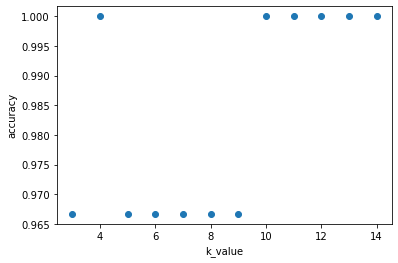

In [43]:
plt.plot(neighbors,acc_values,'o')
plt.xlabel('k_value')
plt.ylabel('accuracy')

In [81]:
classifier = KNeighborsClassifier(n_neighbors = 4)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [82]:
print('Accuracy Score is : ',accuracy_score(y_test,y_pred))
print('Recall Score is : ', recall_score(y_test,y_pred, average='micro'))
print('Precision Score is : ', precision_score(y_test,y_pred, average='micro'))
print('F1 score is : ', f1_score(y_test,y_pred, average='micro'))

Accuracy Score is :  1.0
Recall Score is :  1.0
Precision Score is :  1.0
F1 score is :  1.0


In [83]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [84]:
# SVM model
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state = 0)
classifier.fit(x_train,y_train)
y_pred_svc = classifier.predict(x_test)

In [85]:
print('Accuracy Score is : ',accuracy_score(y_test,y_pred))
print('Recall Score is : ', recall_score(y_test,y_pred, average='micro'))
print('Precision Score is : ', precision_score(y_test,y_pred, average='micro'))
print('F1 score is : ', f1_score(y_test,y_pred, average='micro'))

Accuracy Score is :  1.0
Recall Score is :  1.0
Precision Score is :  1.0
F1 score is :  1.0


# Conclusion:

All the classification models gives the same accuracy and F1 score. Hence, all models are suitable for the dataset.